# Imports and file locations

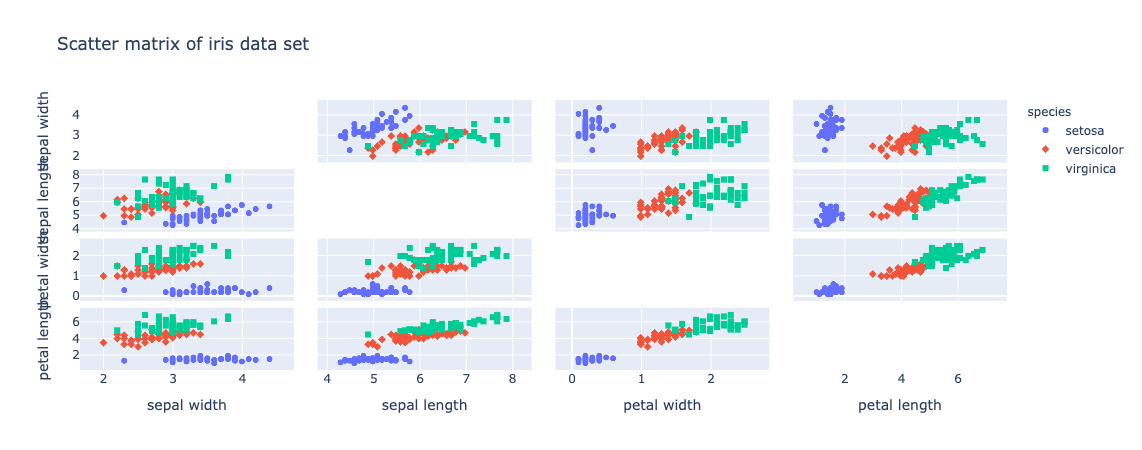

In [1]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species", symbol="species",
    title="Scatter matrix of iris data set",
    labels={col:col.replace('_', ' ') for col in df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()

In [7]:
import numpy as np

import pandas as pd
# import holoviews as hv
# from holoviews import dim, opts

# from bokeh.models import HoverTool


# hv.extension('bokeh')

In [4]:
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/data/cross-species/correlation'
outdir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/correlation'
outdirs = outdir_local, outdir_gdrive
for d in outdirs:
    ! mkdir -p $d
!ls -lha $outdir_local

total 7.3M
drwxr-xr-x  2 olga czb 4.0K Jun 11 10:15 .
drwxrwxr-x 14 olga czb 8.0K Jun  9 10:08 ..
-rw-r--r--  1 olga czb 6.2M Jun  9 11:06 cross_species_median_diffs_tidy.csv
-rw-r--r--  1 olga czb 447K Jun  9 11:06 cross_species_median_diffs_tidy.parquet
-rw-r--r--  1 olga czb 699K Jun 11 12:48 narrow_medians_nonzero.csv
-rw-r--r--  1 olga czb 6.1K Jun 11 12:47 n_celltypes_per_species.xlsx


## Read medians

In [10]:
csv = f'{outdir_local}/narrow_medians_nonzero.csv'
medians = pd.read_csv(csv, index_col=0, header=[0, 1])
print(medians.shape)
medians.head()

(4088, 42)


human                                   \
         endothelial - Capillary endothelial - Capillary Aerocyte   
ISG15                        1.0                              1.0   
TNFRSF18                     0.0                              0.0   
TNFRSF4                      0.0                              0.0   
SDF4                         0.0                              0.0   
UBE2J2                       0.0                              0.0   

                                                                          \
         endothelial - Lymphatic epithelial - Alveolar Epithelial Type 2   
ISG15                        0.0                                     0.0   
TNFRSF18                     0.0                                     0.0   
TNFRSF4                      0.0                                     0.0   
SDF4                         0.0                                     0.0   
UBE2J2                       0.0                                     0.0   

                                                                        \
         lymphoid - CD4+ T lymphoid - Natural Killer lymphoid - Plasma   
ISG15                  1.0                       0.0               0.0   
TNFRSF18               0.0                       0.0               1.0   
TNFRSF4                0.0                       0.0               1.0   
SDF4                   0.0                       1.0               1.5   
UBE2J2                 0.0                       0.0               0.0   

                                                             \
         lymphoid - Proliferating NK/T myeloid - Macrophage   
ISG15                              1.0                  4.0   
TNFRSF18                           0.0                  0.0   
TNFRSF4                            0.0                  0.0   
SDF4                               0.0                  1.0   
UBE2J2                             0.0                  0.0   

                             ...             mouse                            \
         myeloid - Monocyte  ... lymphoid - CD4+ T lymphoid - Natural Killer   
ISG15                   1.0  ...               0.0                       0.0   
TNFRSF18                0.0  ...               0.0                       0.0   
TNFRSF4                 0.0  ...               0.0                       0.0   
SDF4                    0.0  ...               1.0                       1.0   
UBE2J2                  0.0  ...               0.0                       0.0   

                                                                               \
         lymphoid - Plasma lymphoid - Proliferating NK/T myeloid - Macrophage   
ISG15                  0.0                           0.0                  0.0   
TNFRSF18               0.0                           1.0                  0.0   
TNFRSF4                0.0                           0.0                  0.0   
SDF4                   2.0                           2.0                  0.0   
UBE2J2                 0.0                           1.0                  0.0   

                                                         \
         myeloid - Monocyte myeloid - Myeloid Dendritic   
ISG15                   0.0                         0.0   
TNFRSF18                0.0                         0.0   
TNFRSF4                 0.0                         0.0   
SDF4                    1.0                         1.0   
UBE2J2                  0.0                         0.0   

                                                                              \
         myeloid - Proliferating Macrophage stromal - Adventitial Fibroblast   
ISG15                                   0.0                              0.0   
TNFRSF18                                0.0                              0.0   
TNFRSF4                                 0.0                              0.0   
SDF4                                    0.0                              1.0   
UBE2J2                    

In [11]:
ls -lha $csv

-rw-r--r-- 1 olga czb 699K Jun 11 12:48 /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/correlation/narrow_medians_nonzero.csv


In [12]:
medians_tidy = medians.stack(level=1)
print(medians_tidy.shape)
# Add 1 and do log10
medians_tidy = np.log10(medians_tidy + 1)
medians_tidy = medians_tidy.reset_index()
medians_tidy = medians_tidy.rename(columns={'level_0': 'gene_name', 
                                            'level_1': 'compartment_narrow'})
medians_tidy.head()

(57232, 3)


gene_name                       compartment_narrow    human  lemur  mouse
0     ISG15                  endothelial - Capillary  0.30103    0.0    0.0
1     ISG15         endothelial - Capillary Aerocyte  0.30103    0.0    0.0
2     ISG15                  endothelial - Lymphatic  0.00000    0.0    0.0
3     ISG15  epithelial - Alveolar Epithelial Type 2  0.00000    0.0    0.0
4     ISG15                        lymphoid - CD4+ T  0.30103    0.0    0.0

# HOloviews - Bokeh

In [23]:
# table = hv.Dataset(medians_tidy, vdims=['human', 'lemur', 'mouse'], kdims=['compartment_narrow', 'gene_name'])
# matrix = hv.operation.gridmatrix(table.groupby('compartment_narrow'))

# tooltips = [
# #     ('Gene', 'asdf'),
#     ('Human', '@human'),
#     ('Lemur', '@lemur'),
#     ('Mouse', '@mouse'),
# ]
# hover = HoverTool(tooltips=tooltips)

# matrix.opts(opts.Points(tools=['box_select', 'lasso_select', hover], 
#                          border=0, hover_line_color='indianred', hover_color='indianred'))

In [14]:
at2 = "epithelial - Alveolar Epithelial Type 2"
medians_tidy_subset = medians_tidy.query('(compartment_narrow == @at2)')
medians_tidy_subset.head()

gene_name                       compartment_narrow  human    lemur    mouse
3      ISG15  epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
17  TNFRSF18  epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
31   TNFRSF4  epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
45      SDF4  epithelial - Alveolar Epithelial Type 2    0.0  0.30103  0.30103
59    UBE2J2  epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000

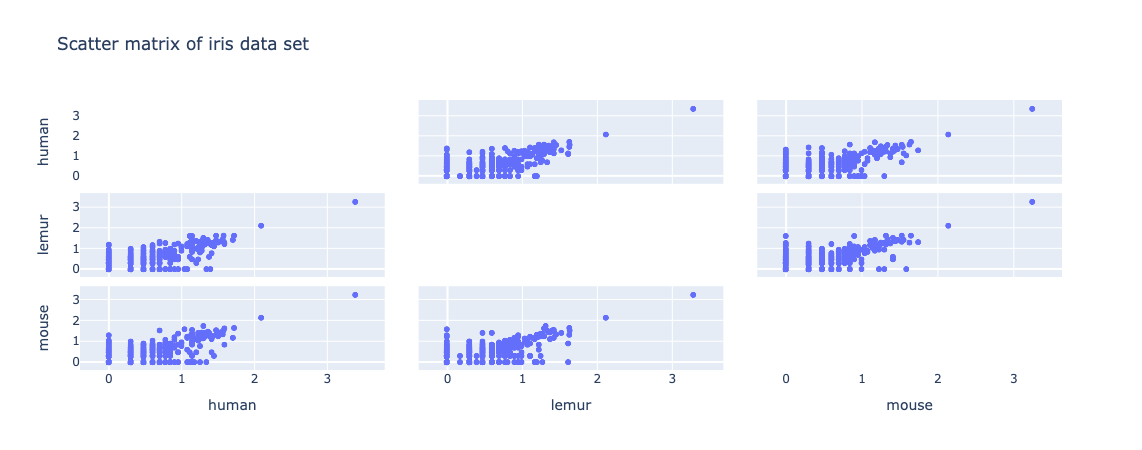

In [17]:
fig = px.scatter_matrix(medians_tidy_subset,
    dimensions=["human", "lemur", "mouse"],
#     color="species", symbol="species",
                        hover_data=['gene_name'],
    title="Scatter matrix of iris data set",
    labels={col:col.replace('_', ' ') for col in df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()

In [41]:
# hv.Points?

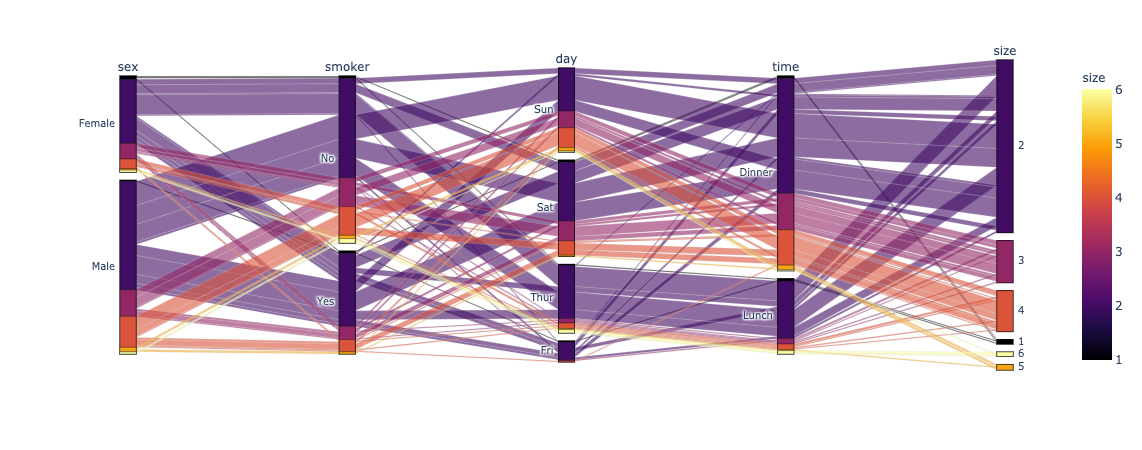

In [18]:
df = px.data.tips()
fig = px.parallel_categories(df, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

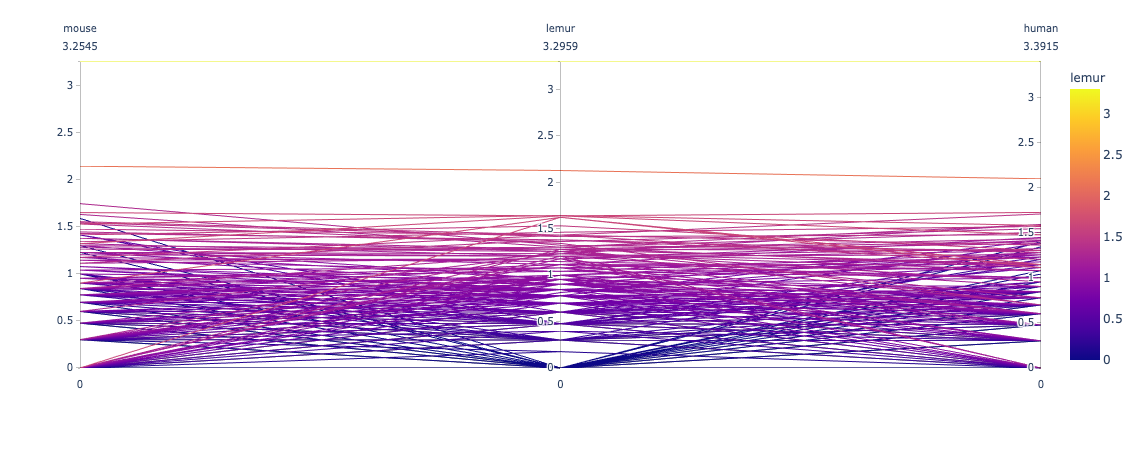

In [31]:
fig = px.parallel_coordinates(medians_tidy_subset, 
                             dimensions=[ "mouse", 'lemur', "human"], 
#                              hover_data=['gene_name']
                              color='lemur',
#                               name='gene_name',
#                               labels=['gene_name',  "mouse", 'lemur', "human"]
                            )
fig.show()

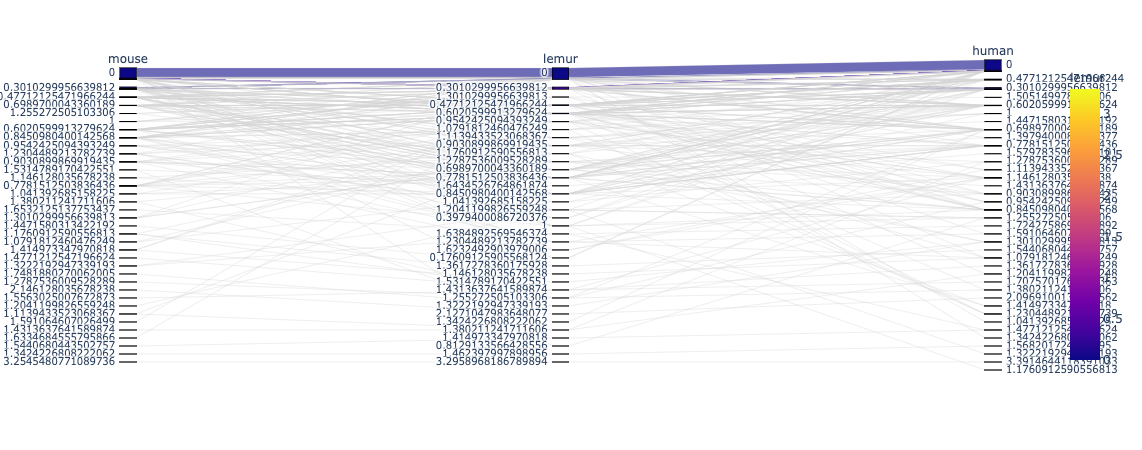

In [32]:
fig = px.parallel_categories(medians_tidy_subset, 
                             dimensions=[ "mouse", 'lemur', "human"], 
#                              hover_data=['gene_name']
                              color='lemur',
#                               name='gene_name',
#                               labels=['gene_name',  "mouse", 'lemur', "human"]
                            )
fig.show()

In [37]:
cols = ["mouse", 'lemur', "human"]
# medians_tidy_subset.groupby(cols)

In [40]:
medians_tidy_subset_nonzero = medians_tidy_subset.loc[(medians_tidy_subset[cols] > 0).any(axis=1)]
print(medians_tidy_subset_nonzero.shape)
medians_tidy_subset_nonzero.head()

(1357, 5)


gene_name                       compartment_narrow     human    lemur  \
45       SDF4  epithelial - Alveolar Epithelial Type 2  0.000000  0.30103   
87   AURKAIP1  epithelial - Alveolar Epithelial Type 2  0.477121  0.30103   
101    MRPL20  epithelial - Alveolar Epithelial Type 2  0.477121  0.30103   
129     SSU72  epithelial - Alveolar Epithelial Type 2  0.301030  0.30103   
171      GNB1  epithelial - Alveolar Epithelial Type 2  0.000000  0.30103   

        mouse  
45   0.301030  
87   0.301030  
101  0.301030  
129  0.301030  
171  0.477121

In [54]:
at2_df = medians_tidy_subset.set_index('gene_name')
print(at2_df.shape)
at2_df.head()

(4088, 4)


compartment_narrow  human    lemur    mouse
gene_name                                                                  
ISG15      epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
TNFRSF18   epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
TNFRSF4    epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
SDF4       epithelial - Alveolar Epithelial Type 2    0.0  0.30103  0.30103
UBE2J2     epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000

In [60]:
quantile_cols = []

for col in cols:
    series = medians_tidy_subset_nonzero[col]
    series_quantile = pd.Series('zero', index=series.index)
    
    series_nonzero = series[series > 0]
    quantile_col = f'{col}_quantile'
    series_quantile[series_nonzero.index] = pd.qcut(series_nonzero, 
            q=2, labels=['low', 'high'])
#     quantile_cols.append(quantile_col)
    at2_df[quantile_col] = series_quantile
at2_df.head()

ValueError: Bin edges must be unique: array([0.30103   , 0.30103   , 3.25454808]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [58]:
series_nonzero

45       0.301030
87       0.301030
101      0.301030
129      0.301030
171      0.477121
           ...   
56843    0.477121
57025    0.301030
57053    0.301030
57081    0.477121
57151    0.301030
Name: mouse, Length: 830, dtype: float64

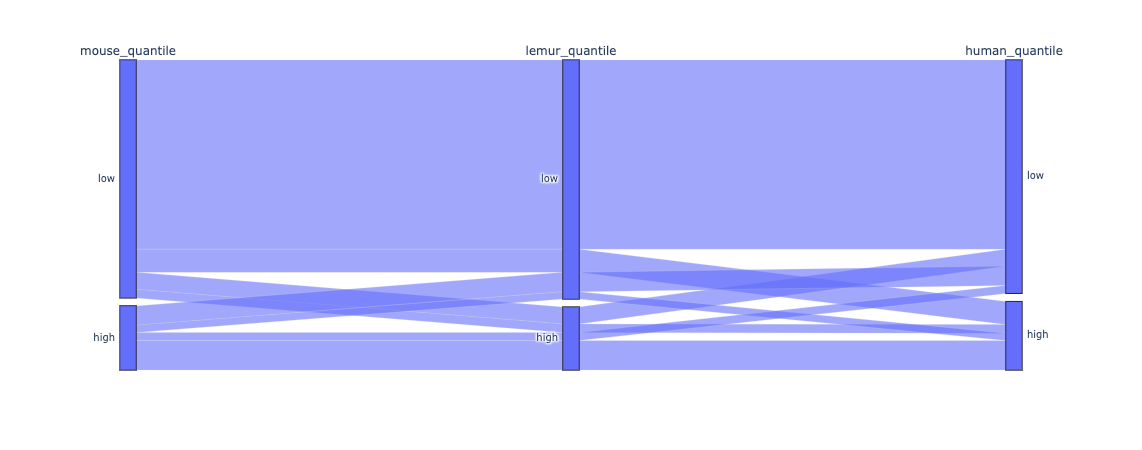

In [53]:
df = px.data.tips()
fig = px.parallel_categories(medians_tidy_subset_nonzero, #color="lemur", 
                             dimensions=quantile_cols,
                             color_continuous_scale=px.colors.sequential.Darkmint)
fig.show()

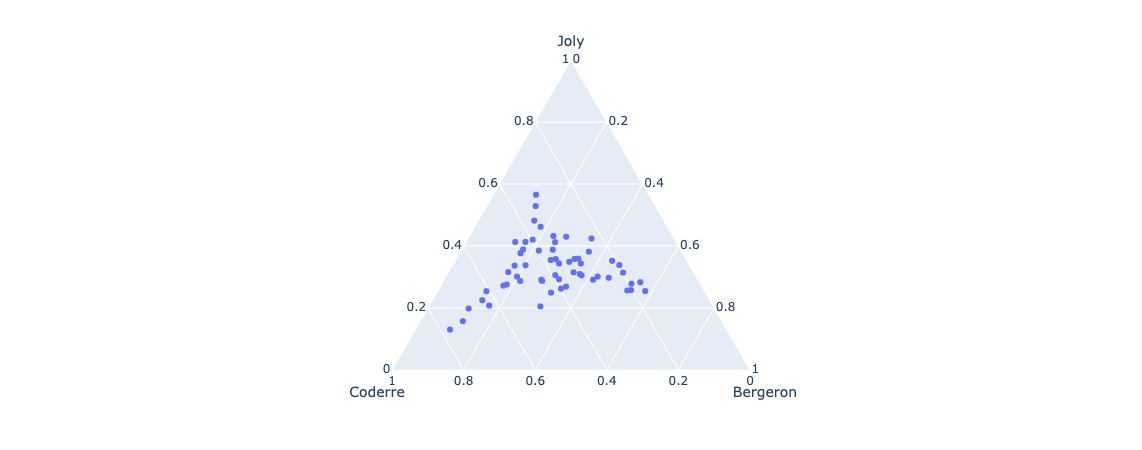

In [61]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron")
fig.show()

In [66]:
medians_tidy_subset.head()

gene_name                       compartment_narrow  human    lemur    mouse
3      ISG15  epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
17  TNFRSF18  epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
31   TNFRSF4  epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000
45      SDF4  epithelial - Alveolar Epithelial Type 2    0.0  0.30103  0.30103
59    UBE2J2  epithelial - Alveolar Epithelial Type 2    0.0  0.00000  0.00000

In [69]:
medians_tidy_subset_index = medians_tidy_subset.set_index('gene_name').drop('compartment_narrow', axis=1)
medians_tidy_subset_index = medians_tidy_subset_index.divide(medians_tidy_subset_index.max())
medians_tidy_subset_index.head()

human     lemur     mouse
gene_name                           
ISG15        0.0  0.000000  0.000000
TNFRSF18     0.0  0.000000  0.000000
TNFRSF4      0.0  0.000000  0.000000
SDF4         0.0  0.091335  0.092495
UBE2J2       0.0  0.000000  0.000000

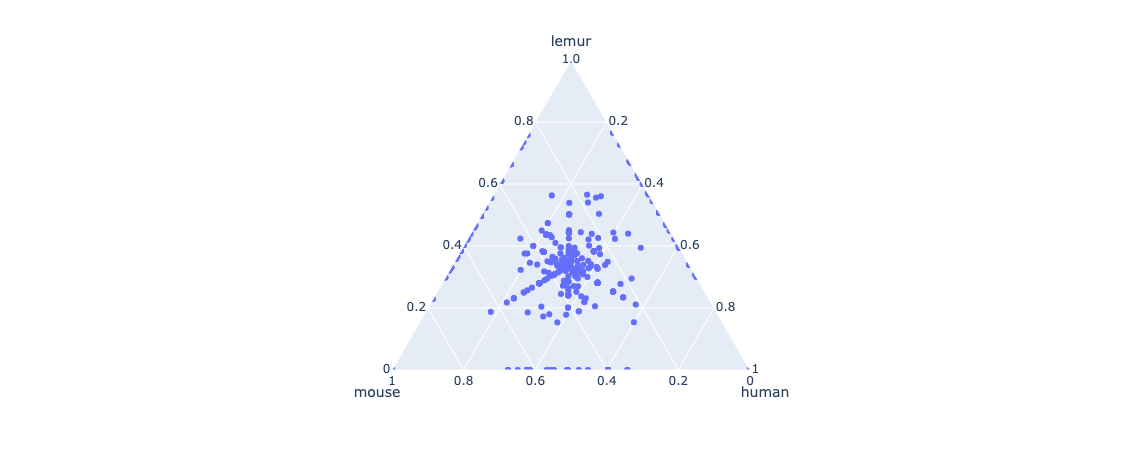

In [71]:
medians_tidy_subset_rescaled = medians_tidy_subset_index.reset_index()

fig = px.scatter_ternary(medians_tidy_subset_rescaled, a="lemur", b="mouse", c="human",  hover_name="gene_name",)
fig.show()